In [1]:
'''
DWT-Haar Wavelet Transform
- Atanda Abdullahi Adewale 
'''

import numpy as np
import cv2
import pywt
from matplotlib import pyplot as plt

def dwt_threshold(img, threshold):
    coeffs = pywt.dwt2(img, 'haar')
    cA, (cH, cV, cD) = coeffs
    cA_thresh = np.where(np.abs(cA) < threshold, 0, cA)
    cH_thresh = np.where(np.abs(cH) < threshold, 0, cH)
    cV_thresh = np.where(np.abs(cV) < threshold, 0, cV)
    cD_thresh = np.where(np.abs(cD) < threshold, 0, cD)
    coeffs_thresh = (cA_thresh, (cH_thresh, cV_thresh, cD_thresh))
    img_thresh = pywt.idwt2(coeffs_thresh, 'haar')
    return img_thresh, (cA, (cH, cV, cD))

def compute_psnr(img1, img2):
    # Resize images to match dimensions
    img1 = cv2.resize(img1, (img2.shape[1], img2.shape[0]))
    
    mse = np.mean((img1 - img2) ** 2)
    max_value = np.max(img1)
    psnr = 10 * np.log10((max_value ** 2) / mse)
    return psnr


def add_gaussian_noise(img, std_dev):
    noise = np.random.normal(0, std_dev, img.shape)
    noisy_img = img + noise
    return noisy_img

def optimal_threshold_denoising(img, noise_free_img, max_threshold):
    psnr_values = []
    thresholds = np.linspace(0, max_threshold, 100)
    for threshold in thresholds:
        denoised_img,_ = dwt_threshold(img, threshold)
        psnr = compute_psnr(noise_free_img, denoised_img)
        psnr_values.append(psnr)
    optimal_threshold = thresholds[np.argmax(psnr_values)]
    return optimal_threshold, psnr_values

def plot_images(images, titles, cvt=None): 
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))

    for i, ax in enumerate(axes.flat):
        
        if cvt is None:
            each_image = images[i]
        else:
            each_image = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

        ax.imshow(each_image, cmap='gray')
        ax.set_title(titles[i])
        ax.axis('off')

    plt.show()

def plot_2images(images, titles, cvt=None): 
    fig, axes = plt.subplots(1, 2, figsize=(10, 10))

    for i, ax in enumerate(axes.flat):
        
        if cvt is None:
            each_image = images[i]
        else:
            each_image = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

        ax.imshow(each_image, cmap='gray')
        ax.set_title(titles[i])
        ax.axis('off')

    plt.show()





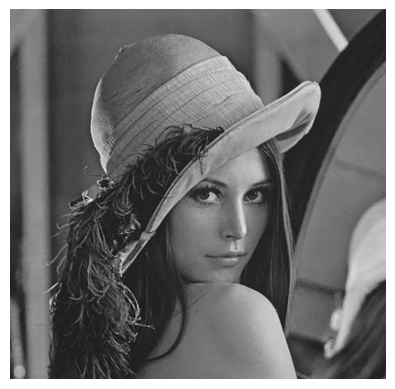

249


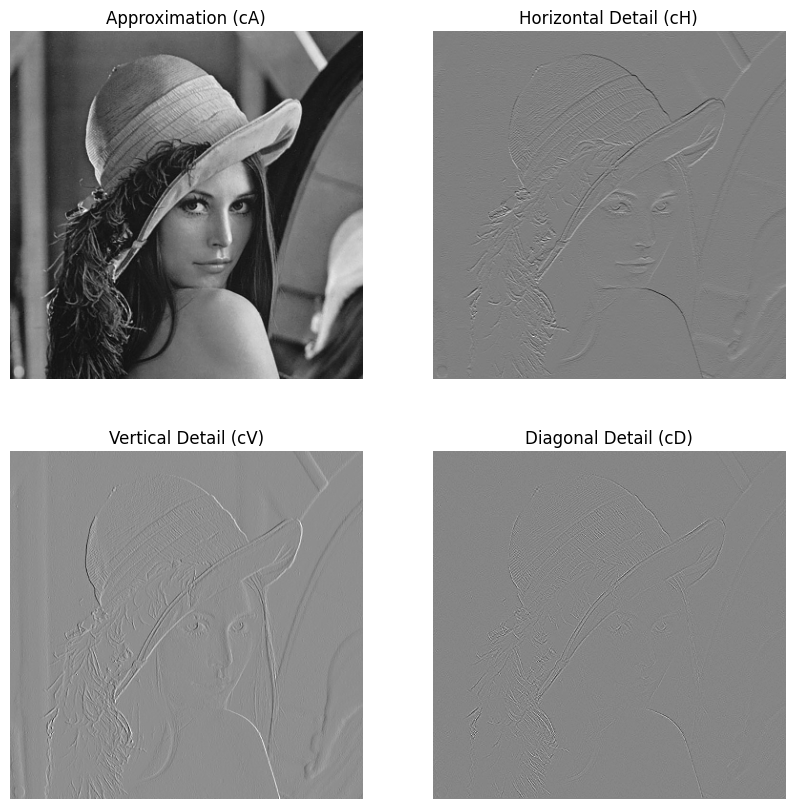

In [2]:
# Load grayscale image
img = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray') 
plt.axis('off')
plt.show()

# Define maximum intensity value
M = np.max(img)
print(M)

# Apply DWT on 1 level
#dwt_img, (cA, (cH, cV, cD)) = dwt_threshold(img, M)
dwt_img, coeffs = dwt_threshold(img, M)
cA, (cH, cV, cD) = coeffs


image_list = [cA, cH, cV, cD]
title_list = ['Approximation (cA)', 'Horizontal Detail (cH)', 'Vertical Detail (cV)', 'Diagonal Detail (cD)']
plot_images(image_list, title_list)



PSNR for reconstruction (DWT-1): 10.47258377947826


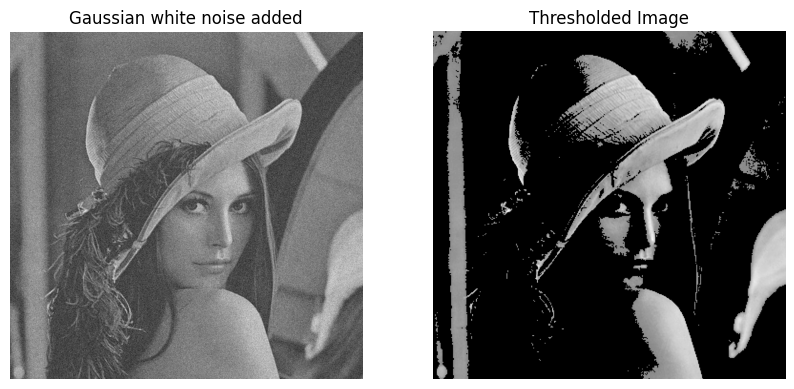

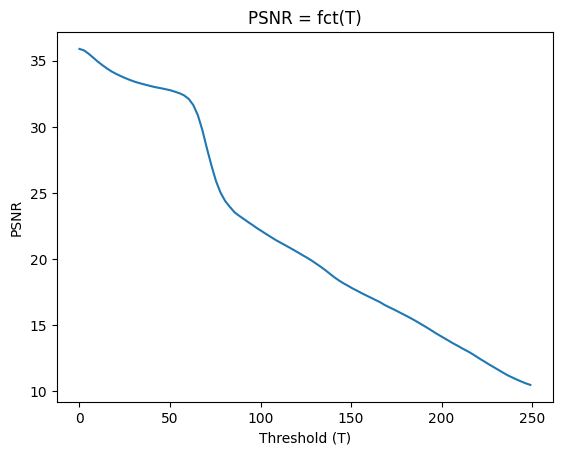

Optimal threshold for denoising (PSNR): 52.81818181818182


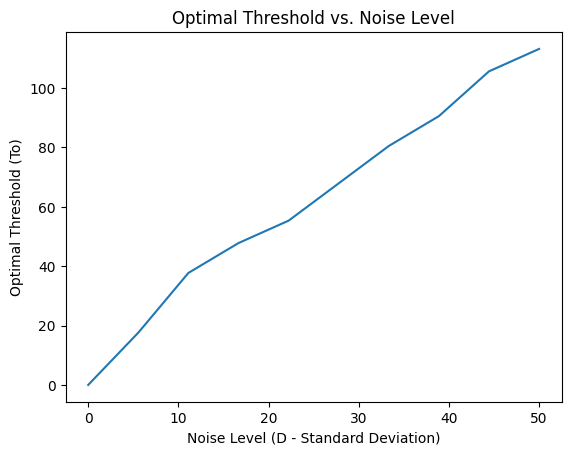

In [3]:
# Compute PSNR for reconstruction
psnr_reconstruction = compute_psnr(img, dwt_img)
print("PSNR for reconstruction (DWT-1):", psnr_reconstruction)

# Plot PSNR = fct(T)
thresholds = np.linspace(0, M, 100) #So, thresholds array will contain 100 values starting from 0 and ending at M, with evenly spaced intervals between them.
psnr_values = []
for threshold in thresholds:
    denoised_img, _  = dwt_threshold(img, threshold)
    psnr = compute_psnr(img, denoised_img)
    psnr_values.append(psnr)

# Add Gaussian white noise to the image
std_dev = 20
noisy_img = add_gaussian_noise(img, std_dev)

image_list2 = [noisy_img, dwt_img]
title_list2 = ['Gaussian white noise added', 'Thresholded Image']
plot_2images(image_list2, title_list2)

plt.figure()
plt.plot(thresholds, psnr_values)
plt.xlabel('Threshold (T)')
plt.ylabel('PSNR')
plt.title('PSNR = fct(T)') #Plot PSNR as a function of the threshold values (T).
plt.show()

# Find the optimal threshold for denoising
optimal_threshold, psnr_values = optimal_threshold_denoising(noisy_img, img, M)
print("Optimal threshold for denoising (PSNR):", optimal_threshold)

# Study the evolution of To in respect of the noise level (D)
std_dev_values = np.linspace(0, 50, 10)
optimal_thresholds = []
for std_dev in std_dev_values:
    noisy_img = add_gaussian_noise(img, std_dev)
    optimal_threshold, _ = optimal_threshold_denoising(noisy_img, img, M)
    optimal_thresholds.append(optimal_threshold)

plt.figure()
plt.plot(std_dev_values, optimal_thresholds)
plt.xlabel('Noise Level (D - Standard Deviation)')
plt.ylabel('Optimal Threshold (To)')
plt.title('Optimal Threshold vs. Noise Level')
plt.show()

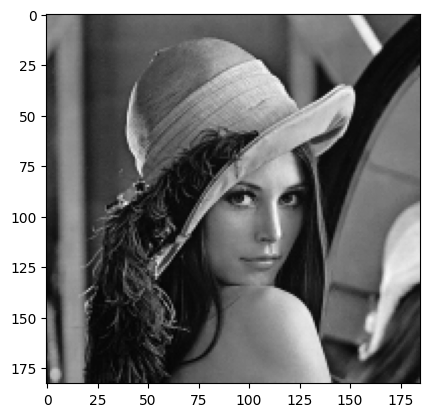

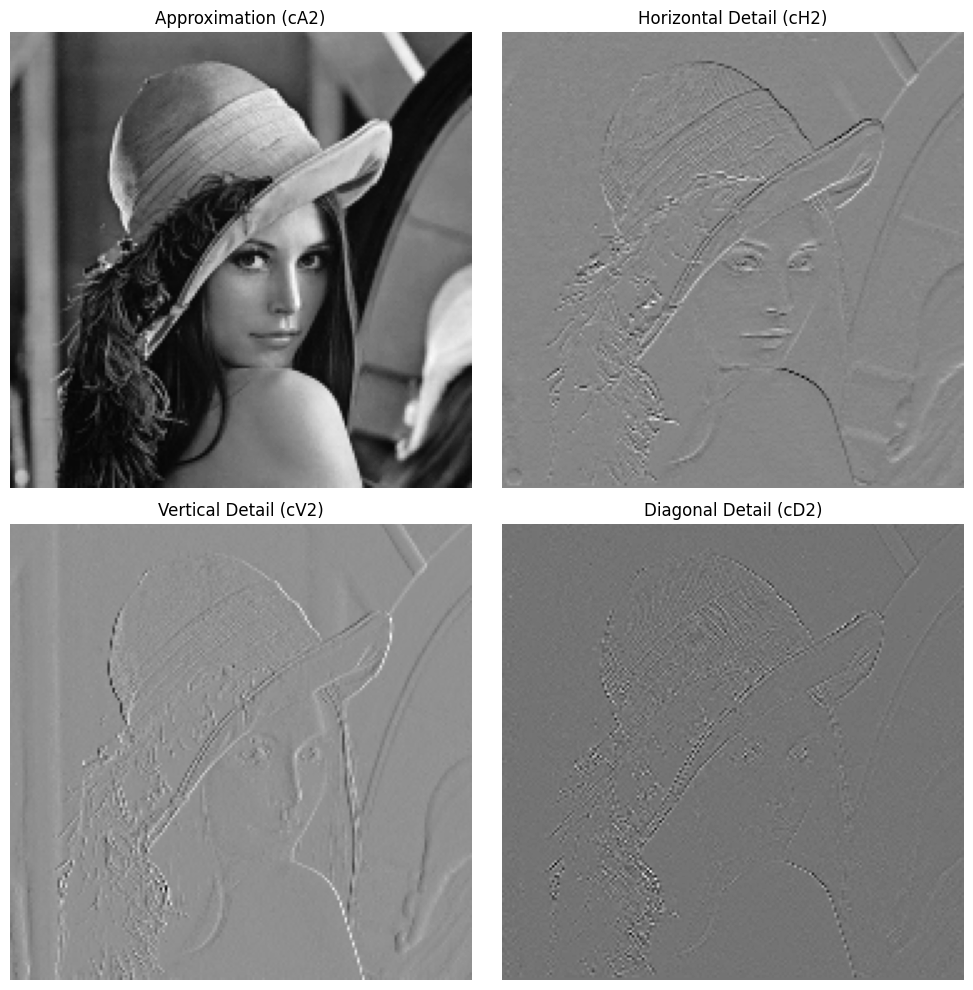

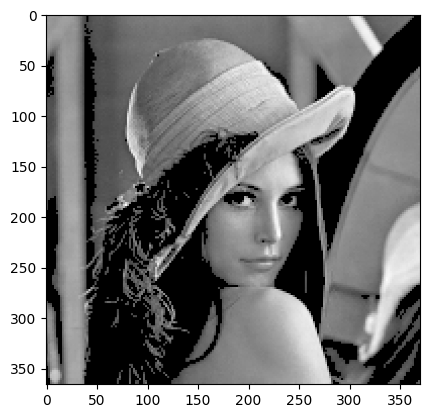

In [4]:
def dwt2_from_dwt1(cA, threshold):
    coeffs2 = pywt.dwt2(cA, 'haar')
    cA2, (cH2, cV2, cD2) = coeffs2

    plt.imshow(cA2, cmap='gray')
    plt.show()

    cA2_thresh = np.where(np.abs(cA2) < threshold, 0, cA2)
    cH2_thresh = np.where(np.abs(cH2) < threshold, 0, cH2)
    cV2_thresh = np.where(np.abs(cV2) < threshold, 0, cV2)
    cD2_thresh = np.where(np.abs(cD2) < threshold, 0, cD2)
    coeffs_thresh2 = (cA2_thresh, (cH2_thresh, cV2_thresh, cD2_thresh))

    img_thresh2 = pywt.idwt2(coeffs_thresh2, 'haar')
    return img_thresh2, (cA2, (cH2, cV2, cD2))

def plot_coefficients(coeffs):
    cA2, (cH2, cV2, cD2) = coeffs

    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs[0, 0].imshow(cA2, cmap='gray')
    axs[0, 0].set_title('Approximation (cA2)')
    axs[0, 0].axis('off')

    axs[0, 1].imshow(cH2, cmap='gray')
    axs[0, 1].set_title('Horizontal Detail (cH2)')
    axs[0, 1].axis('off')

    axs[1, 0].imshow(cV2, cmap='gray')
    axs[1, 0].set_title('Vertical Detail (cV2)')
    axs[1, 0].axis('off')

    axs[1, 1].imshow(cD2, cmap='gray')
    axs[1, 1].set_title('Diagonal Detail (cD2)')
    axs[1, 1].axis('off')

    plt.tight_layout()
    plt.show()


cA2_float = cA.astype(float)
cA2_float = np.maximum(0, np.minimum(cA2_float, 255))
M2 = np.max(cA2_float)
      
img_thresh2, coeffs2 = dwt2_from_dwt1(cA, M2-10)
cA2, (cH2, cV2, cD2) = coeffs2


plot_coefficients(coeffs2)

plt.imshow(img_thresh2, cmap='gray')
plt.show()

# def compute_psnr2(cA1, cA2):
#     mse = np.mean((cA1 - cA2) ** 2)
#     max_value = np.max(cA1)
#     psnr = 10 * np.log10((max_value ** 2) / mse)
#     return psnr


# def optimal_threshold_denoising2(noisy_cA, clean_cA, M):
#     thresholds = np.linspace(0, M, 100)
#     psnr_values = []
    
#     for threshold in thresholds:
#         denoised_cA, _ = dwt2_from_dwt1(noisy_cA, (threshold, threshold, threshold))
#         psnr = compute_psnr2(clean_cA, denoised_cA)
#         psnr_values.append(psnr)
    
#     optimal_threshold = thresholds[np.argmax(psnr_values)]
    
#     return optimal_threshold

# # Set the maximum intensity value
# M2 = 255

# # Set the standard deviation values for Gaussian noise
# std_dev_values = np.linspace(0, 50, 10)

# # Initialize lists to store the optim2al thresholds
# optimal_thresholds_1 = []
# optimal_thresholds_2 = []

# # Perform the process for each standard deviation value
# for std_dev in std_dev_values:
#     # Add Gaussian noise to the image
#     noisy_cA = cA + np.random.normal(0, std_dev, size=cA.shape)
    
#     # Find the optimal thresholds for two levels
#     optimal_threshold_1 = optimal_threshold_denoising2(noisy_cA, cA, M2)
#     optimal_thresholds_1.append(optimal_threshold_1)
    
#     optimal_threshold_2 = optimal_threshold_denoising2(noisy_cA, cA, M2)
#     optimal_thresholds_2.append(optimal_threshold_2)

# # Plot the optimal thresholds
# plt.figure()
# plt.plot(std_dev_values, optimal_thresholds_1, label='T1')
# plt.plot(std_dev_values, optimal_thresholds_2, label='T2')
# plt.xlabel('Standard Deviation (D)')
# plt.ylabel('Threshold (T)')
# plt.title('Optimal Thresholds')
# plt.legend()
# plt.show()